<a href="https://colab.research.google.com/github/dominiksakic/zero_to_hero/blob/main/adv_02_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links:
- https://arxiv.org/abs/1412.6980
- https://arxiv.org/abs/1711.05101
- https://github.com/huggingface/transformers/blob/main/src/transformers/optimization.py


# Vanilla

In [ ]:
import torch

def loss_fn(w):
  return (w - 3.0)**2

In [ ]:
lr =  0.1
w = torch.tensor(0.0, requires_grad=True)

for t in range(20):
  loss = loss_fn(w)
  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    w.grad.zero_()
  print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")


Step  0 | w = 0.6000 | loss = 9.0000
Step  1 | w = 1.0800 | loss = 5.7600
Step  2 | w = 1.4640 | loss = 3.6864
Step  3 | w = 1.7712 | loss = 2.3593
Step  4 | w = 2.0170 | loss = 1.5099
Step  5 | w = 2.2136 | loss = 0.9664
Step  6 | w = 2.3709 | loss = 0.6185
Step  7 | w = 2.4967 | loss = 0.3958
Step  8 | w = 2.5973 | loss = 0.2533
Step  9 | w = 2.6779 | loss = 0.1621
Step 10 | w = 2.7423 | loss = 0.1038
Step 11 | w = 2.7938 | loss = 0.0664
Step 12 | w = 2.8351 | loss = 0.0425
Step 13 | w = 2.8681 | loss = 0.0272
Step 14 | w = 2.8944 | loss = 0.0174
Step 15 | w = 2.9156 | loss = 0.0111
Step 16 | w = 2.9324 | loss = 0.0071
Step 17 | w = 2.9460 | loss = 0.0046
Step 18 | w = 2.9568 | loss = 0.0029
Step 19 | w = 2.9654 | loss = 0.0019


# Momentum
- is exponentially weighted moving average (EWMA) of the gradients.
- memory of past gradients

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta = 0.9
v = torch.tensor(0.0)
v_hist = []

for t in range(20):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        v = beta * v + (1 - beta) * w.grad
        w -= lr * v
        w.grad.zero_()

    v_hist.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

Step  0 | w = 0.0600 | loss = 9.0000
Step  1 | w = 0.1728 | loss = 8.6436
Step  2 | w = 0.3309 | loss = 7.9931
Step  3 | w = 0.5265 | loss = 7.1243
Step  4 | w = 0.7521 | loss = 6.1182
Step  5 | w = 1.0000 | loss = 5.0533
Step  6 | w = 1.2632 | loss = 4.0000
Step  7 | w = 1.5347 | loss = 3.0166
Step  8 | w = 1.8085 | loss = 2.1470
Step  9 | w = 2.0786 | loss = 1.4198
Step 10 | w = 2.3402 | loss = 0.8489
Step 11 | w = 2.5889 | loss = 0.4353
Step 12 | w = 2.8208 | loss = 0.1690
Step 13 | w = 3.0332 | loss = 0.0321
Step 14 | w = 3.2237 | loss = 0.0011
Step 15 | w = 3.3906 | loss = 0.0500
Step 16 | w = 3.5331 | loss = 0.1526
Step 17 | w = 3.6506 | loss = 0.2842
Step 18 | w = 3.7434 | loss = 0.4233
Step 19 | w = 3.8120 | loss = 0.5526


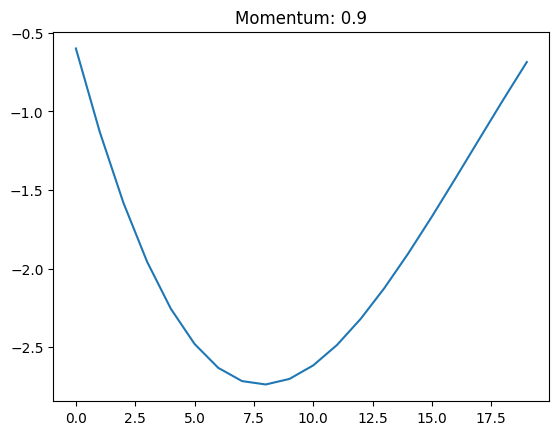

In [ ]:
import matplotlib.pyplot as plt

plt.plot(v_hist)
plt.title("Momentum: 0.9")
plt.show()

Step  0 | w = 0.0000 | loss = 9.0000
Step  1 | w = 0.0000 | loss = 9.0000
Step  2 | w = 0.0000 | loss = 9.0000
Step  3 | w = 0.0000 | loss = 9.0000
Step  4 | w = 0.0000 | loss = 9.0000
Step  5 | w = 0.0000 | loss = 9.0000
Step  6 | w = 0.0000 | loss = 9.0000
Step  7 | w = 0.0000 | loss = 9.0000
Step  8 | w = 0.0000 | loss = 9.0000
Step  9 | w = 0.0000 | loss = 9.0000
Step 10 | w = 0.0000 | loss = 9.0000
Step 11 | w = 0.0000 | loss = 9.0000
Step 12 | w = 0.0000 | loss = 9.0000
Step 13 | w = 0.0000 | loss = 9.0000
Step 14 | w = 0.0000 | loss = 9.0000
Step 15 | w = 0.0000 | loss = 9.0000
Step 16 | w = 0.0000 | loss = 9.0000
Step 17 | w = 0.0000 | loss = 9.0000
Step 18 | w = 0.0000 | loss = 9.0000
Step 19 | w = 0.0000 | loss = 9.0000


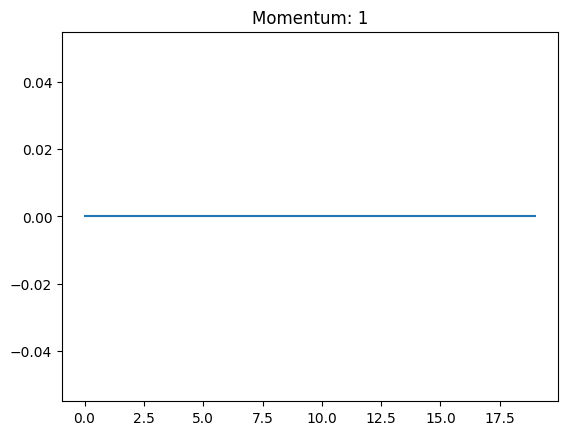

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta = 1
v = torch.tensor(0.0)
v_hist = []

for t in range(20):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        v = beta * v + (1 - beta) * w.grad
        w -= lr * v
        w.grad.zero_()

    v_hist.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

plt.plot(v_hist)
plt.title("Momentum: 1")
plt.show()

Step  0 | w = 0.5940 | loss = 9.0000
Step  1 | w = 1.0763 | loss = 5.7888
Step  2 | w = 1.4620 | loss = 3.7005
Step  3 | w = 1.7704 | loss = 2.3653
Step  4 | w = 2.0170 | loss = 1.5119
Step  5 | w = 2.2141 | loss = 0.9664
Step  6 | w = 2.3716 | loss = 0.6177
Step  7 | w = 2.4976 | loss = 0.3948
Step  8 | w = 2.5984 | loss = 0.2524
Step  9 | w = 2.6789 | loss = 0.1613
Step 10 | w = 2.7433 | loss = 0.1031
Step 11 | w = 2.7948 | loss = 0.0659
Step 12 | w = 2.8359 | loss = 0.0421
Step 13 | w = 2.8688 | loss = 0.0269
Step 14 | w = 2.8951 | loss = 0.0172
Step 15 | w = 2.9161 | loss = 0.0110
Step 16 | w = 2.9330 | loss = 0.0070
Step 17 | w = 2.9464 | loss = 0.0045
Step 18 | w = 2.9571 | loss = 0.0029
Step 19 | w = 2.9657 | loss = 0.0018


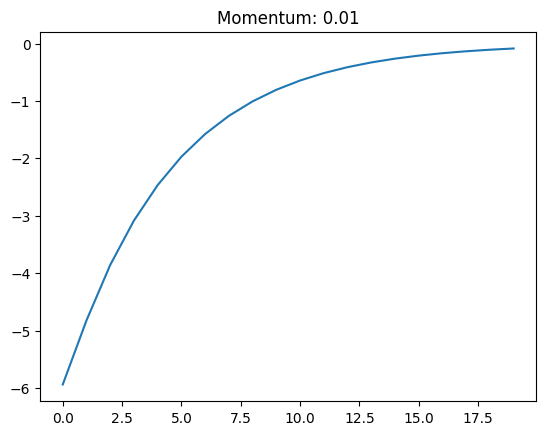

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta = 0.01
v = torch.tensor(0.0)
v_hist = []

for t in range(20):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        v = beta * v + (1 - beta) * w.grad
        w -= lr * v
        w.grad.zero_()

    v_hist.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

plt.plot(v_hist)
plt.title("Momentum: 0.01")
plt.show()

Step  0 | w = 0.3000 | loss = 9.0000
Step  1 | w = 0.7200 | loss = 7.2900
Step  2 | w = 1.1580 | loss = 5.1984
Step  3 | w = 1.5612 | loss = 3.3930
Step  4 | w = 1.9067 | loss = 2.0701
Step  5 | w = 2.1888 | loss = 1.1953
Step  6 | w = 2.4109 | loss = 0.6581
Step  7 | w = 2.5809 | loss = 0.3470
Step  8 | w = 2.7078 | loss = 0.1756
Step  9 | w = 2.8005 | loss = 0.0854
Step 10 | w = 2.8668 | loss = 0.0398
Step 11 | w = 2.9132 | loss = 0.0178
Step 12 | w = 2.9451 | loss = 0.0075
Step 13 | w = 2.9666 | loss = 0.0030
Step 14 | w = 2.9806 | loss = 0.0011
Step 15 | w = 2.9896 | loss = 0.0004
Step 16 | w = 2.9951 | loss = 0.0001
Step 17 | w = 2.9984 | loss = 0.0000
Step 18 | w = 3.0002 | loss = 0.0000
Step 19 | w = 3.0010 | loss = 0.0000


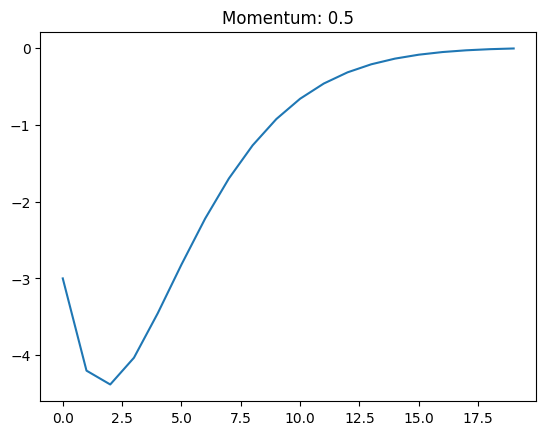

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta = 0.5
v = torch.tensor(0.0)
v_hist = []

for t in range(20):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        v = beta * v + (1 - beta) * w.grad
        w -= lr * v
        w.grad.zero_()

    v_hist.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

plt.plot(v_hist)
plt.title("Momentum: 0.5")
plt.show()

Step  0 | w = -0.6000 | loss = 9.0000
Step  1 | w = -2.5200 | loss = 12.9600
Step  2 | w = -7.4640 | loss = 30.4704
Step  3 | w = -19.4448 | loss = 109.4953
Step  4 | w = -47.8954 | loss = 503.7691
Step  5 | w = -114.9756 | loss = 2590.3379
Step  6 | w = -272.7310 | loss = 13918.2314
Step  7 | w = -643.3882 | loss = 76027.6094
Step  8 | w = -1513.9803 | loss = 417817.7500
Step  9 | w = -3558.5605 | loss = 2301229.2500
Step 10 | w = -8360.0332 | loss = 12684714.0000
Step 11 | w = -19635.5859 | loss = 69940328.0000
Step 12 | w = -46114.4062 | loss = 385674048.0000
Step 13 | w = -108295.5312 | loss = 2126815104.0000
Step 14 | w = -254317.4844 | loss = 11728571392.0000
Step 15 | w = -597225.5000 | loss = 64678907904.0000
Step 16 | w = -1402487.2500 | loss = 356681875456.0000
Step 17 | w = -3293508.5000 | loss = 1966978891776.0000
Step 18 | w = -7734254.0000 | loss = 10847217778688.0000
Step 19 | w = -18162596.0000 | loss = 59818731634688.0000


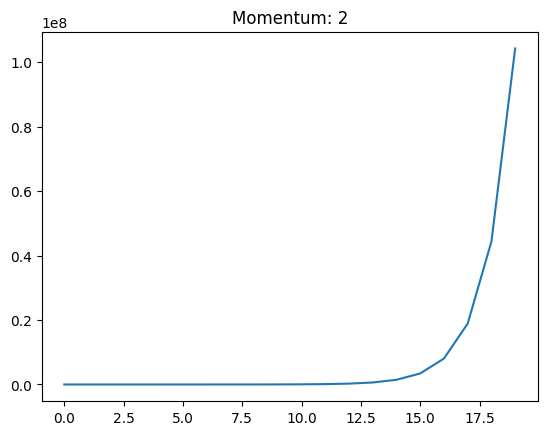

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta = 2
v = torch.tensor(0.0)
v_hist = []

for t in range(20):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        v = beta * v + (1 - beta) * w.grad
        w -= lr * v
        w.grad.zero_()

    v_hist.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

plt.plot(v_hist)
plt.title("Momentum: 2")
plt.show()

# Adaptive Learning Rates
- adds adaptive learning rates — it tracks both mean and squared mean of gradients:

Step  1 | w = 0.1000 | loss = 9.0000
Step  2 | w = 0.1999 | loss = 8.4100
Step  3 | w = 0.2996 | loss = 7.8406
Step  4 | w = 0.3991 | loss = 7.2921
Step  5 | w = 0.4982 | loss = 6.7648
Step  6 | w = 0.5969 | loss = 6.2589
Step  7 | w = 0.6951 | loss = 5.7747
Step  8 | w = 0.7928 | loss = 5.3124
Step  9 | w = 0.8897 | loss = 4.8719
Step 10 | w = 0.9858 | loss = 4.4535
Step 11 | w = 1.0811 | loss = 4.0570
Step 12 | w = 1.1753 | loss = 3.6824
Step 13 | w = 1.2685 | loss = 3.3295
Step 14 | w = 1.3604 | loss = 2.9982
Step 15 | w = 1.4510 | loss = 2.6883
Step 16 | w = 1.5402 | loss = 2.3993
Step 17 | w = 1.6279 | loss = 2.1309
Step 18 | w = 1.7140 | loss = 1.8826
Step 19 | w = 1.7982 | loss = 1.6539
Step 20 | w = 1.8806 | loss = 1.4443


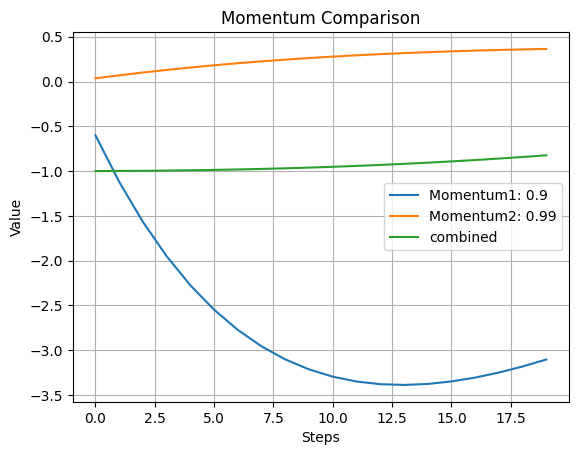

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
m = torch.tensor(0.0)  # first moment
v = torch.tensor(0.0)  # second moment

momentum1, momentum2 = [], []
combined = []

for t in range(1, 21):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        g = w.grad
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        interim = m_hat / (v_hat.sqrt() + eps)
        w -= lr * m_hat / (v_hat.sqrt() + eps)
        w.grad.zero_()

    combined.append(interim.item())
    momentum1.append(m.item())
    momentum2.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

plt.plot(momentum1, label="Momentum1: 0.9")
plt.plot(momentum2, label="Momentum2: 0.99")
plt.plot(combined, label="combined")
plt.title("Momentum Comparison")
plt.xlabel("Steps")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Step  1 | w = 0.3162 | loss = 9.0000
Step  2 | w = 0.7393 | loss = 7.2026
Step  3 | w = 1.2263 | loss = 5.1108
Step  4 | w = 1.7492 | loss = 3.1459
Step  5 | w = 2.2832 | loss = 1.5646
Step  6 | w = 2.8034 | loss = 0.5138
Step  7 | w = 3.2836 | loss = 0.0386
Step  8 | w = 3.6980 | loss = 0.0805
Step  9 | w = 4.0251 | loss = 0.4872
Step 10 | w = 4.2529 | loss = 1.0509
Step 11 | w = 4.3796 | loss = 1.5698
Step 12 | w = 4.4123 | loss = 1.9032
Step 13 | w = 4.3635 | loss = 1.9945
Step 14 | w = 4.2481 | loss = 1.8591
Step 15 | w = 4.0812 | loss = 1.5577
Step 16 | w = 3.8778 | loss = 1.1691
Step 17 | w = 3.6517 | loss = 0.7705
Step 18 | w = 3.4163 | loss = 0.4248
Step 19 | w = 3.1837 | loss = 0.1733
Step 20 | w = 2.9650 | loss = 0.0337


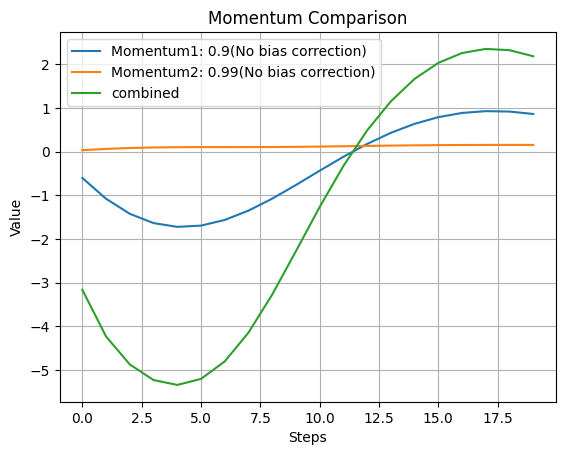

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
m = torch.tensor(0.0)  # first moment
v = torch.tensor(0.0)  # second moment

momentum1, momentum2 = [], []
combined = []

for t in range(1, 21):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        g = w.grad
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        interim = m / (v.sqrt() + eps)
        w -= lr * m / (v.sqrt() + eps)
        w.grad.zero_()

    combined.append(interim.item())
    momentum1.append(m.item())
    momentum2.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

plt.plot(momentum1, label="Momentum1: 0.9(No bias correction)")
plt.plot(momentum2, label="Momentum2: 0.99(No bias correction)")
plt.plot(combined, label="combined")
plt.title("Momentum Comparison")
plt.xlabel("Steps")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Step  1 | w = 0.1000 | loss = 9.0000
Step  2 | w = 0.1989 | loss = 8.4100
Step  3 | w = 0.2969 | loss = 7.8462
Step  4 | w = 0.3943 | loss = 7.3067
Step  5 | w = 0.4912 | loss = 6.7897
Step  6 | w = 0.5877 | loss = 6.2941
Step  7 | w = 0.6840 | loss = 5.8190
Step  8 | w = 0.7800 | loss = 5.3638
Step  9 | w = 0.8758 | loss = 4.9283
Step 10 | w = 0.9714 | loss = 4.5121
Step 11 | w = 1.0668 | loss = 4.1151
Step 12 | w = 1.1619 | loss = 3.7373
Step 13 | w = 1.2568 | loss = 3.3785
Step 14 | w = 1.3515 | loss = 3.0387
Step 15 | w = 1.4458 | loss = 2.7177
Step 16 | w = 1.5398 | loss = 2.4156
Step 17 | w = 1.6335 | loss = 2.1322
Step 18 | w = 1.7267 | loss = 1.8675
Step 19 | w = 1.8195 | loss = 1.6213
Step 20 | w = 1.9117 | loss = 1.3936


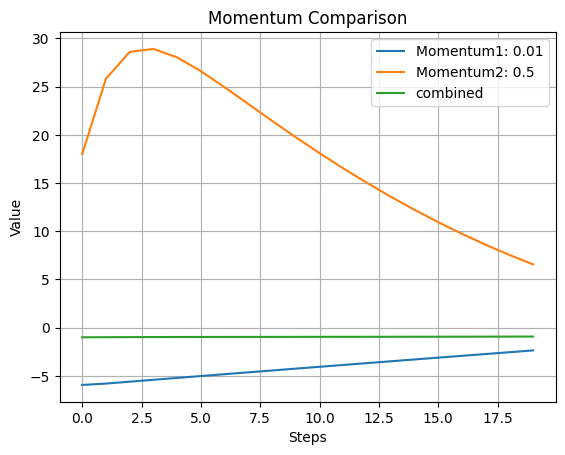

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta1 = 0.01
beta2 = 0.5
eps = 1e-8
m = torch.tensor(0.0)  # first moment
v = torch.tensor(0.0)  # second moment

momentum1, momentum2 = [], []
combined = []

for t in range(1, 21):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        g = w.grad
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        interim = m_hat / (v_hat.sqrt() + eps)
        w -= lr * m_hat / (v_hat.sqrt() + eps)
        w.grad.zero_()

    combined.append(interim.item())
    momentum1.append(m.item())
    momentum2.append(v.item())
    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

plt.plot(momentum1, label="Momentum1: 0.01")
plt.plot(momentum2, label="Momentum2: 0.5")
plt.plot(combined, label="combined")
plt.title("Momentum Comparison")
plt.xlabel("Steps")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Adam vs AdamW
- Adam L2 regularized loss = loss_fn(w) + lambda_ * w**2
- --> This makes the gradient itself regularized, which doesn’t behave well with adaptive updates.
- AdamW dosent penalize gradients. Just decay the weights directly.

Step  1 | w = 0.1000 | loss = 9.0000
Step  2 | w = 0.1989 | loss = 8.4100
Step  3 | w = 0.2966 | loss = 7.8462
Step  4 | w = 0.3931 | loss = 7.3082
Step  5 | w = 0.4884 | loss = 6.7957
Step  6 | w = 0.5822 | loss = 6.3083
Step  7 | w = 0.6747 | loss = 5.8457
Step  8 | w = 0.7656 | loss = 5.4072
Step  9 | w = 0.8550 | loss = 4.9925
Step 10 | w = 0.9428 | loss = 4.6009
Step 11 | w = 1.0289 | loss = 4.2321
Step 12 | w = 1.1132 | loss = 3.8853
Step 13 | w = 1.1957 | loss = 3.5599
Step 14 | w = 1.2764 | loss = 3.2554
Step 15 | w = 1.3550 | loss = 2.9709
Step 16 | w = 1.4317 | loss = 2.7059
Step 17 | w = 1.5063 | loss = 2.4595
Step 18 | w = 1.5788 | loss = 2.2311
Step 19 | w = 1.6491 | loss = 2.0198
Step 20 | w = 1.7172 | loss = 1.8249


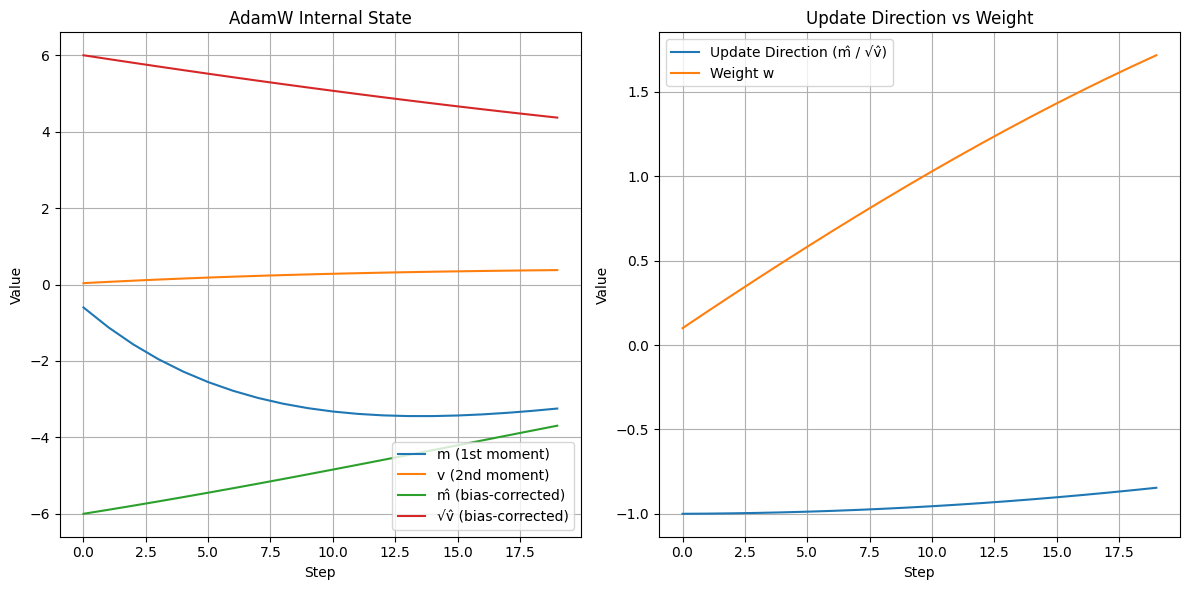

In [ ]:
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
weight_decay = 0.1

m = torch.tensor(0.0)  # first moment
v = torch.tensor(0.0)  # second moment

# Histories
momentum1 = []         # m
momentum2 = []         # v
sqrt_v_hat = []        # sqrt(v̂)
m_hat_vals = []        # m̂
update_direction = []  # m̂ / sqrt(v̂)
w_vals = []            # value of w

# Training loop
for t in range(1, 21):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        g = w.grad
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        direction = m_hat / (v_hat.sqrt() + eps)
        w *= (1 - lr * weight_decay)
        w -= lr * direction
        w.grad.zero_()

    # Store internals
    momentum1.append(m.item())
    momentum2.append(v.item())
    m_hat_vals.append(m_hat.item())
    sqrt_v_hat.append(v_hat.sqrt().item())
    update_direction.append(direction.item())
    w_vals.append(w.item())

    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(momentum1, label="m (1st moment)")
plt.plot(momentum2, label="v (2nd moment)")
plt.plot(m_hat_vals, label="m̂ (bias-corrected)")
plt.plot(sqrt_v_hat, label="√v̂ (bias-corrected)")
plt.title("AdamW Internal State")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(update_direction, label="Update Direction (m̂ / √v̂)")
plt.plot(w_vals, label="Weight w")
plt.title("Update Direction vs Weight")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Step  1 | w = 0.3162 | loss = 9.0000
Step  2 | w = 0.7361 | loss = 7.2026
Step  3 | w = 1.2159 | loss = 5.1251
Step  4 | w = 1.7268 | loss = 3.1831
Step  5 | w = 2.2446 | loss = 1.6209
Step  6 | w = 2.7451 | loss = 0.5706
Step  7 | w = 3.2035 | loss = 0.0650
Step  8 | w = 3.5962 | loss = 0.0414
Step  9 | w = 3.9038 | loss = 0.3554
Step 10 | w = 4.1154 | loss = 0.8169
Step 11 | w = 4.2295 | loss = 1.2441
Step 12 | w = 4.2530 | loss = 1.5116
Step 13 | w = 4.1983 | loss = 1.5701
Step 14 | w = 4.0800 | loss = 1.4359
Step 15 | w = 3.9136 | loss = 1.1664
Step 16 | w = 3.7141 | loss = 0.8346
Step 17 | w = 3.4958 | loss = 0.5099
Step 18 | w = 3.2722 | loss = 0.2458
Step 19 | w = 3.0555 | loss = 0.0741
Step 20 | w = 2.8563 | loss = 0.0031


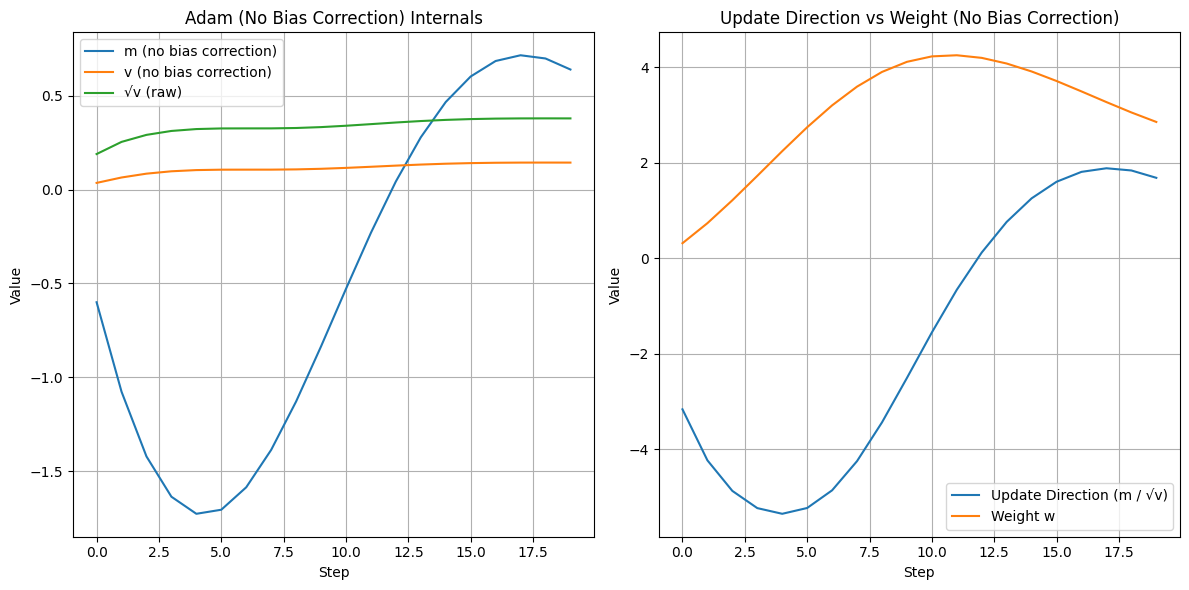

In [ ]:
import torch
import matplotlib.pyplot as plt

def loss_fn(w):
    return (w - 3.0)**2  # minimum at w = 3

# Hyperparameters
w = torch.tensor(0.0, requires_grad=True)
lr = 0.1
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
weight_decay = 0.1

m = torch.tensor(0.0)  # first moment
v = torch.tensor(0.0)  # second moment

# Histories for plotting
momentum1 = []         # m
momentum2 = []         # v
sqrt_v = []            # sqrt(v)
update_direction = []  # m / sqrt(v)
w_vals = []            # w

# Training loop (no bias correction!)
for t in range(1, 21):
    loss = loss_fn(w)
    loss.backward()

    with torch.no_grad():
        g = w.grad
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        direction = m / (v.sqrt() + eps)  # no bias correction
        w *= (1 - lr * weight_decay)      # AdamW-style decay
        w -= lr * direction
        w.grad.zero_()

    # Store values
    momentum1.append(m.item())
    momentum2.append(v.item())
    sqrt_v.append(v.sqrt().item())
    update_direction.append(direction.item())
    w_vals.append(w.item())

    print(f"Step {t:2d} | w = {w.item():.4f} | loss = {loss.item():.4f}")

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(momentum1, label="m (no bias correction)")
plt.plot(momentum2, label="v (no bias correction)")
plt.plot(sqrt_v, label="√v (raw)")
plt.title("Adam (No Bias Correction) Internals")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(update_direction, label="Update Direction (m / √v)")
plt.plot(w_vals, label="Weight w")
plt.title("Update Direction vs Weight (No Bias Correction)")
plt.xlabel("Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
#BOILTERPLATE
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline


--2025-07-11 23:01:33--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.004s  

2025-07-11 23:01:33 (61.6 MB/s) - ‘names.txt’ saved [228145/228145]



In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

words = open('names.txt', 'r').read().splitlines()

# build vocab and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i : s for s, i in stoi.items()}
vocab_size = len(itos)


# build the dataset
block_size = 8

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

Using device: cuda
torch.Size([182625, 8]) torch.Size([182625])
torch.Size([22655, 8]) torch.Size([22655])
torch.Size([22866, 8]) torch.Size([22866])


In [22]:
class EmbeddingWithReshape(nn.Module):
  def __init__(self, vocab_size, n_embd):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, n_embd)
  def forward(self, x):
    # x: (B, T)
    x = self.embedding(x) # (B,T,C)
    x = x.transpose(1, 2) # (B,C,T)
    return x

# Pytroch implementation
class DialatedConvolution(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, dilation):
    super().__init__()
    self.kernel_size = kernel_size
    self.padding = dilation * (kernel_size - 1)
    self.conv = nn.Conv1d(
        in_channels,
        out_channels,
        kernel_size,
        dilation=dilation
    )

  def forward(self, x):
    # Pad left side only.
    x = F.pad(x, (self.padding, 0))
    return self.conv(x)


In [27]:
n_embd = 10
n_hidden = 200
block_size = 8

model = nn.Sequential(
    EmbeddingWithReshape(vocab_size, n_embd),
    DialatedConvolution(n_embd, n_hidden, kernel_size=2, dilation=1),
    nn.BatchNorm1d(n_hidden),
    nn.Tanh(),

    DialatedConvolution(n_hidden, n_hidden, kernel_size=2, dilation=2),
    nn.BatchNorm1d(n_hidden),
    nn.Tanh(),

    DialatedConvolution(n_hidden, n_hidden, kernel_size=2, dilation=4),
    nn.BatchNorm1d(n_hidden),
    nn.Tanh(),

    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(n_hidden, vocab_size),
)

model = model.to(device)

In [28]:
parameters = list(model.parameters())
optimizer = torch.optim.AdamW(parameters, lr=1e-03)
print(f"Parameters: {sum((p.nelement() for p in parameters))}")

Parameters: 171497


In [29]:
def split_loss(split):
  model.eval()
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]

  with torch.no_grad():
    x = x.to(device)
    y = y.to(device)
    logits = model(x)
    loss = F.cross_entropy(logits, y)
    preds = torch.argmax(logits, dim=1)
    acc = (preds == y).float().mean()

    probs = F.softmax(logits, dim=1)
    log_probs = torch.log(probs + 1e-9)
    entropy = -(probs * log_probs).sum(dim=1).mean()
  return loss, acc, entropy

In [30]:
max_steps = 200000
batch_size = 32
tr_loss_his, dev_loss_his = [], []
tr_acc_his, dev_acc_his = [], []
train_entropy_his, dev_entropy_his = [], []

for i in range(max_steps):
  model.train()
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,))
  Xb, Yb = Xtr[ix].to(device), Ytr[ix].to(device)

  # forward pass
  logits = model(Xb)
  train_loss = F.cross_entropy(logits, Yb)

  # accuracy
  preds = torch.argmax(logits, dim=1)
  train_acc = (preds == Yb).float().mean()

  # logits: (batch_size, vocab_size)
  probs = F.softmax(logits, dim=1)                    # (B, C)
  log_probs = torch.log(probs + 1e-9)                 # prevent log(0)
  entropy = -(probs * log_probs).sum(dim=1).mean()    # average over batch


  # backward pass
  optimizer.zero_grad(set_to_none=True)
  train_loss.backward()

  # update
  optimizer.step()

  with torch.no_grad():
    dev_loss, dev_acc, dev_entropy = split_loss('val')

  # track stats
  if i % 10000 == 0:
    print(f'{i:7d}/{max_steps:7d} - Train loss: {train_loss.item():.4f} Acc: {train_acc:.4f} | Val loss: {dev_loss.item():.4f} Acc: {dev_acc:.4f}')

  tr_loss_his.append(train_loss.log10().item())
  dev_loss_his.append(dev_loss.log10().item())
  tr_acc_his.append(train_acc.log10().item())
  dev_acc_his.append(dev_acc.log10().item())
  train_entropy_his.append(entropy.item())
  dev_entropy_his.append(dev_entropy.item())

      0/ 200000 - Train loss: 3.3361 Acc: 0.0312 | Val loss: 3.2661 Acc: 0.1495
  10000/ 200000 - Train loss: 1.8858 Acc: 0.4688 | Val loss: 2.2066 Acc: 0.3186
  20000/ 200000 - Train loss: 1.7292 Acc: 0.3750 | Val loss: 2.1398 Acc: 0.3339
  30000/ 200000 - Train loss: 2.2311 Acc: 0.2500 | Val loss: 2.0848 Acc: 0.3495
  40000/ 200000 - Train loss: 1.8124 Acc: 0.3750 | Val loss: 2.0839 Acc: 0.3469
  50000/ 200000 - Train loss: 2.1307 Acc: 0.3438 | Val loss: 2.0600 Acc: 0.3597
  60000/ 200000 - Train loss: 1.9470 Acc: 0.3125 | Val loss: 2.0508 Acc: 0.3567
  70000/ 200000 - Train loss: 1.9709 Acc: 0.2812 | Val loss: 2.0407 Acc: 0.3604
  80000/ 200000 - Train loss: 2.0134 Acc: 0.2812 | Val loss: 2.0389 Acc: 0.3619
  90000/ 200000 - Train loss: 1.6655 Acc: 0.4688 | Val loss: 2.0400 Acc: 0.3576
 100000/ 200000 - Train loss: 1.9428 Acc: 0.4062 | Val loss: 2.0368 Acc: 0.3638
 110000/ 200000 - Train loss: 2.2364 Acc: 0.3750 | Val loss: 2.0304 Acc: 0.3630
 120000/ 200000 - Train loss: 1.8454 Acc

In [31]:
# convert to tensors
tr_loss_t = torch.tensor(tr_loss_his)
dev_loss_t = torch.tensor(dev_loss_his)
tr_acc_t  = torch.tensor(tr_acc_his)
dev_acc_t = torch.tensor(dev_acc_his)

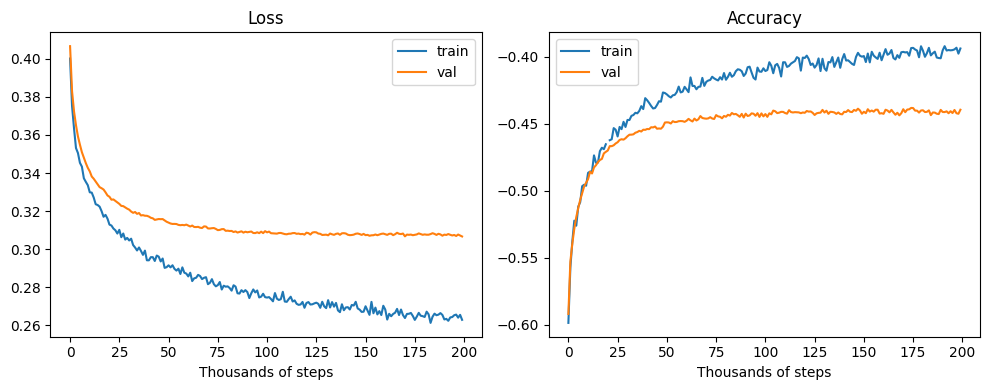

In [32]:
chunk = 1000
tr_loss_smooth = tr_loss_t.view(-1, chunk).mean(1)
dev_loss_smooth = dev_loss_t.view(-1, chunk).mean(1)
tr_acc_smooth = tr_acc_t.view(-1, chunk).mean(1)
dev_acc_smooth = dev_acc_t.view(-1, chunk).mean(1)
train_ent = torch.tensor(train_entropy_his).view(-1, 1000).mean(1)
val_ent = torch.tensor(dev_entropy_his).view(-1, 1000).mean(1)

# plot
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(tr_loss_smooth, label='train')
plt.plot(dev_loss_smooth, label='val')
plt.title('Loss')
plt.xlabel('Thousands of steps')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(tr_acc_smooth, label='train')
plt.plot(dev_acc_smooth, label='val')
plt.title('Accuracy')
plt.xlabel('Thousands of steps')
plt.legend()

plt.subplot(1,3,3)
plt.plot(train_ent, label='train')
plt.plot(val_ent, label='val')
plt.title('Entropy of Output Distribution')
plt.xlabel('Thousands of steps')
plt.ylabel('Entropy (nats)')

plt.tight_layout()
plt.show()

In [33]:
# sample from the model
for _ in range(20):

    out = []
    context = [0] * block_size
    context = torch.tensor([context], dtype=torch.long).to(device)
    while True:
      logits = model(context)
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      out.append(ix)
      # shift the context window and track the samples
      context = torch.cat([context[:, 1:], torch.tensor([[ix]], device=device)], dim=1)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

amin.
dreolha.
doby.
reese.
martria.
roseli.
tyren.
madilyn.
piana.
storber.
mohca.
lyncy.
wretley.
mavidi.
ladriy.
brino.
gragon.
brigx.
shurz.
auriy.
